In [ ]:
#How do renewable energy usage, electricity access, and forest area influence CO₂ emissions per capita?

In [ ]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
import sqlite3
import pandas as pd

# Connect to your local DB
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Load 1 row to get column names
df = pd.read_sql_query("SELECT * FROM Environmental_Indicators LIMIT 1;", conn)

# Print all column names
for col in df.columns:
    print(col)


Country Name
Country Code
Time
Time Code
Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990) [EN.GHG.CO2.ZG.AR5]
Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]
Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]
Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]
Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]
Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]
Forest area (sq. km) [AG.LND.FRST.K2]


Coefficients: [-2.30961994  1.58558147 -0.76013452  0.57965248]
Intercept: 4.629577209431372
R² Score: 0.0696
MSE: 136.345


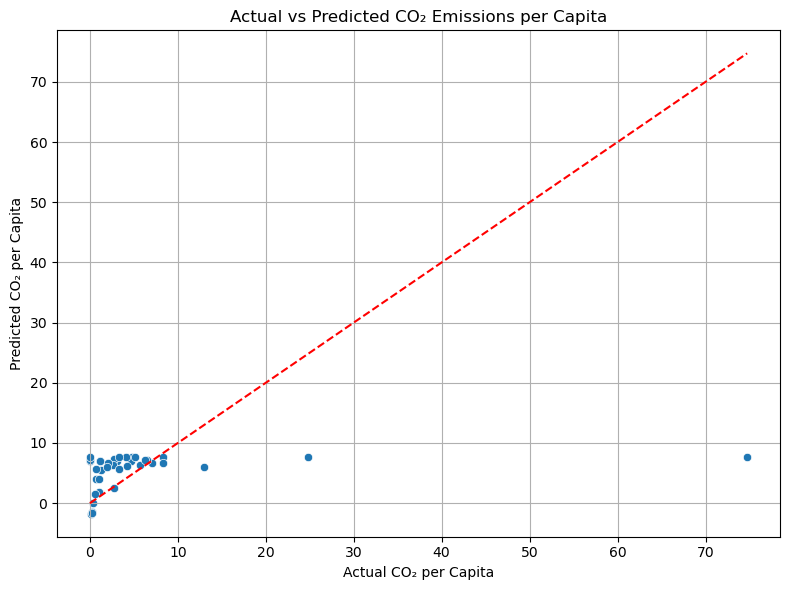

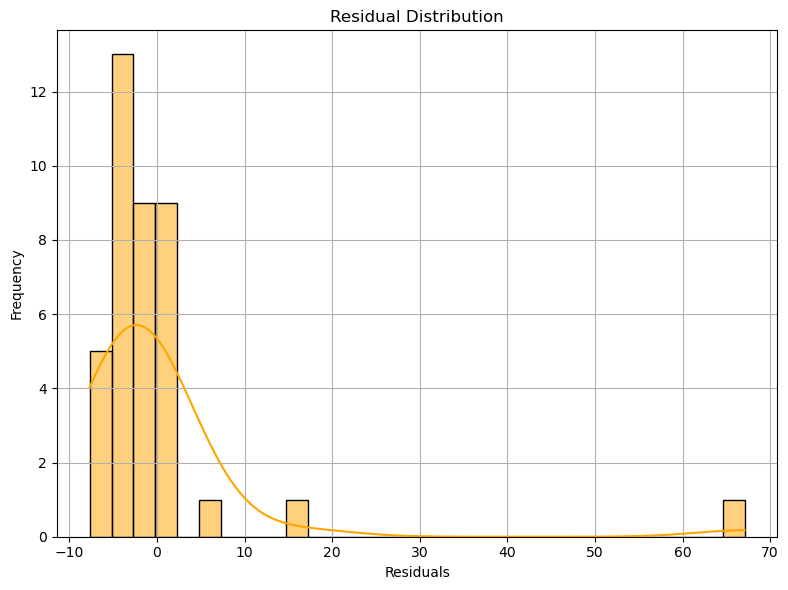

In [8]:
#  Connect to your database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

#  SQL query for MLR
query = """
SELECT 
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" AS CO2_per_capita,
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" AS Renewable_energy_pct,
    "Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]" AS Access_rural_pct,
    "Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]" AS Access_urban_pct,
    "Forest area (sq. km) [AG.LND.FRST.K2]" AS Forest_area
FROM Environmental_Indicators
WHERE 
    CO2_per_capita IS NOT NULL AND
    Renewable_energy_pct IS NOT NULL AND
    Access_rural_pct IS NOT NULL AND
    Access_urban_pct IS NOT NULL AND
    Forest_area IS NOT NULL
LIMIT 500;
"""
#  Load and clean the data
df = pd.read_sql(query, conn)
df = df[(df != '..').all(axis=1)].astype(float)

#  Define target and features
X = df[['Renewable_energy_pct', 'Access_rural_pct', 'Access_urban_pct', 'Forest_area']]
y = df['CO2_per_capita']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit MLR model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", round(r2, 4))
print("MSE:", round(mse, 4))

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual CO₂ per Capita")
plt.ylabel("Predicted CO₂ per Capita")
plt.title("Actual vs Predicted CO₂ Emissions per Capita")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization: Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


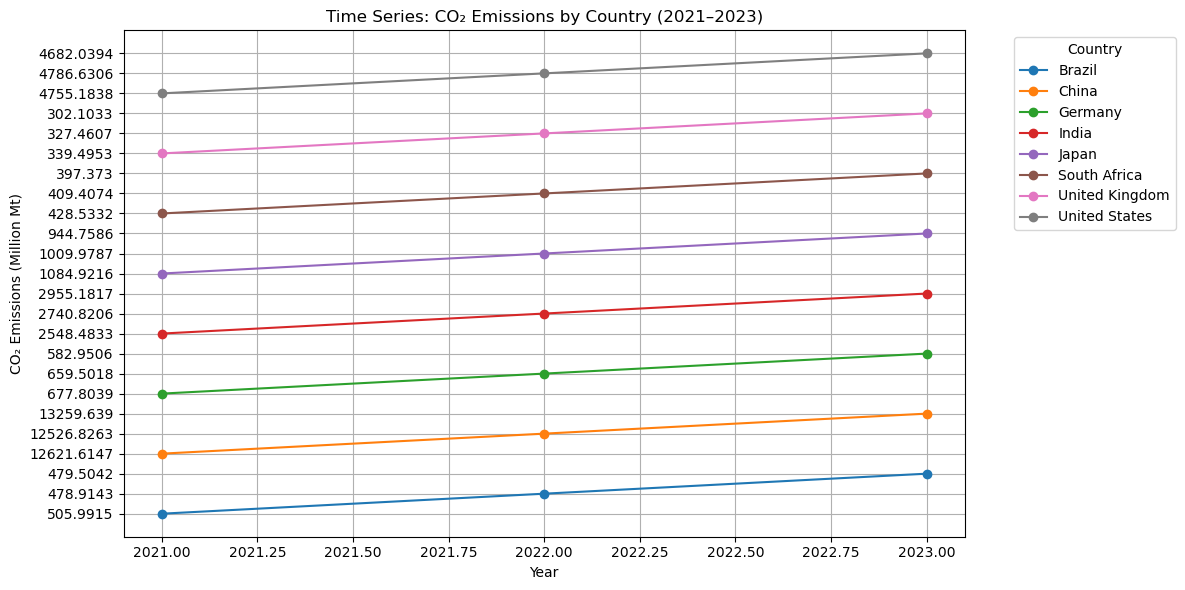

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to your database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Step 2: Query data for 2021–2023 CO2 emissions for key countries
query = """
SELECT 
    "Country Name" AS Country,
    "Time" AS Year,
    "Carbon dioxide (CO2) emissions (total) excluding LULUCF (Mt CO2e) [EN.GHG.CO2.MT.CE.AR5]" AS CO2_total
FROM Environmental_Indicators
WHERE 
    "Country Name" IN ('Brazil', 'China', 'Germany', 'India', 'Japan', 
                       'South Africa', 'United Kingdom', 'United States') AND
    "Time" IN (2021, 2022, 2023)
"""
df = pd.read_sql_query(query, conn)
df['Year'] = df['Year'].astype(int)
df = df[df['CO2_total'].notnull()]  # Clean nulls

# Step 3: Pivot data to plot
df_pivot = df.pivot(index='Year', columns='Country', values='CO2_total')

# Step 4: Plot time series
plt.figure(figsize=(12, 6))
for country in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[country], marker='o', label=country)

plt.title('Time Series: CO₂ Emissions by Country (2021–2023)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Mt)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
